In [7]:
qtconsole

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.animation as anim

In [2]:
%matplotlib inline

In [3]:
plt.style.use('seaborn')

Loading CSV:

In [4]:
names = pd.read_csv('names_nationaldata.csv')

In [5]:
names.head()

,name,sex,number,year
0,Mary,F,54901,1939
1,Barbara,F,37258,1939
2,Patricia,F,29706,1939
3,Betty,F,23641,1939
4,Shirley,F,20445,1939


In [6]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
name      object
sex       object
number    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


# EDA

## Total names listed per year

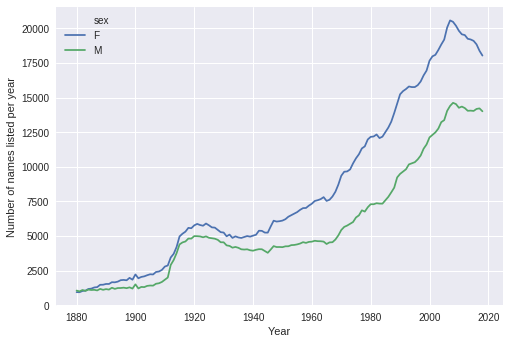

In [8]:
nameslistedperyear = names.groupby(['year', 'sex'])[['name']].count().reset_index()
ax2 = sns.lineplot(x='year', y='name', hue='sex', data=nameslistedperyear)
ax2.xaxis.set_label_text('Year')
ax2.yaxis.set_label_text('Number of names listed per year')
plt.show()

The number of names listed each year has increased. So there must be new names coming into fashion.

## Finding the new names

In [9]:
names.sort_values(['sex', 'year', 'number'], ascending=False).head(10)

,name,sex,number,year
80837,Liam,M,19837,2018
80838,Noah,M,18267,2018
80839,William,M,14516,2018
80840,James,M,13525,2018
80841,Oliver,M,13389,2018
80842,Benjamin,M,13381,2018
80843,Elijah,M,12886,2018
80844,Lucas,M,12585,2018
80845,Mason,M,12435,2018
80846,Logan,M,12352,2018


In [ ]:
# Making wordclouds of top 100 names per year

for s in ['M', 'F']:
    images = []
    fig = plt.figure(figsize=(16,9))
    _ = plt.axis("off")
    yearsrange = range(names.year.min(), names.year.max())

    for yr in yearsrange:
        tempM = names[['name', 'number']][
            np.logical_and(names.sex=='M', names.year==yr)
        ].sort_values(['number'], ascending=False)
        tempM = tempM.to_numpy()[:100]
        counts = tempM[:,1] / tempM[:,1].min()
        tempM[:,1] = counts.astype(int)
        wordcloud = WordCloud(background_color="white")
        wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
        plt_im = plt.imshow(wordcloud, interpolation="bilinear")
        plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, 
                          bbox=dict(facecolor='white', alpha=0.9))
        images.append([plt_im, plt_txt])

    animation = anim.ArtistAnimation(fig, images)
    animation.save('top100{}names.gif'.format(s), writer='imagemagick', fps=4)

Finding names that appeared and disappeared

In [ ]:
namesM = names[names.sex=='M'].reset_index(drop=True)
namesM.head()

In [ ]:
namesM.info()

In [ ]:
namesMperYear = namesM.pivot(index='year', columns='name', values='number')
namesMperYear = namesMperYear.replace(to_replace=np.NaN, value=0)

In [ ]:
namesMperYear.head()

#### Nombre por año mujeres

In [ ]:
namesF = names[names.sex=='F'].reset_index(drop=True)

In [ ]:
namesFperYear = namesF.pivot(index='year', columns='name', values='number')
namesFperYear = namesFperYear.replace(to_replace=np.NaN, value=0)

In [ ]:
namesFperYear.head()